In [1]:
import numpy as np
import pandas as pd

In [2]:
boxdf = pd.read_csv('dataforEDA_boxcox_updated.csv')

In [3]:
df = pd.read_csv('maindf1')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
boxdf.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import scipy.stats as st

In [9]:
df

,member_id,loan_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,sub_grade,emp_title,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Grade,home_ownership,verification_status,purpose,addr_state
0,58189336,14350,14350.000000,36,OTHERS,19.19,E3,Technician,9.0,28700.00,33.88,0,1,50.0,14,1,22515,73.1,28,1173.84,0.000000,0.00,0.0000,26.0,0,0.000000,28699.000000,30800.000000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,A,OWN,Not Verified,debt_consolidation,zone4
1,70011223,4800,4800.000000,36,BAT1586599,10.99,B4,Public Coordinator,1.0,65000.00,3.64,0,1,30.0,6,0,7624,23.2,13,83.95,0.000000,0.00,0.0000,9.0,0,0.000000,9974.000000,32900.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,B,RENT,Verified,debt_consolidation,zone4
2,70255675,10000,10000.000000,36,BAT1586599,7.26,A4,Driver,2.0,45000.00,18.42,0,0,30.0,5,0,10877,31.2,19,56.47,0.000000,0.00,0.0000,9.0,0,65.000000,38295.000000,34900.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,A,MORTGAGE,Verified,Business,zone2
3,1893936,15000,15000.000000,36,BAT4808022,19.72,D5,Engineer,10.0,105000.00,14.97,0,2,46.0,10,0,13712,55.5,21,4858.62,0.000000,0.00,0.0000,135.0,0,0.000000,55564.000000,24700.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,D,MORTGAGE,Verified,Business,zone4
4,7652106,16000,16000.000000,36,BAT2833642,10.64,B2,Others,10.0,52000.00,20.16,0,0,30.0,11,0,35835,76.2,27,2296.41,0.000000,0.00,0.0000,96.0,0,0.000000,47159.000000,47033.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,B,RENT,Verified,Personal,zone3
5,10247268,15000,14950.000000,36,BAT2575549,8.90,A5,Technician,2.0,120000.00,12.30,0,0,56.0,18,0,19040,64.5,30,1957.24,0.000000,0.00,0.0000,113.0,0,0.000000,350619.000000,29500.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,B,RENT,Verified,Personal,zone5
6,8089625,5000,4975.000000,36,OTHERS,7.90,A4,Others,5.0,75000.00,5.70,0,0,30.0,13,2,13272,23.9,23,578.36,0.000000,0.00,0.0000,117.0,0,1023.000000,13272.000000,55500.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,E,RENT,Verified,debt_consolidation,zone4
7,23043116,6000,6000.000000,36,OTHERS,9.17,B1,Public Coordinator,8.0,54000.00,11.63,0,1,46.0,13,0,3484,29.5,49,637.51,0.000000,0.00,0.0000,78.0,0,0.000000,272579.000000,11800.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,B,RENT,Source Verified,debt_consolidation,zone4
8,45900933,6000,6000.000000,36,BAT4136152,13.99,C4,Others,7.0,92000.00,30.85,0,0,77.0,16,0,47567,76.6,27,621.72,0.000000,0.00,0.0000,44.0,0,0.000000,281521.000000,62100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,F,RENT,Not Verified,Personal,zone4
9,41272507,34550,34550.000000,60,BAT4694572,17.14,D4,Nurse,2.0,72000.00,33.92,0,0,30.0,12,0,30040,90.5,30,5535.46,0.000000,0.00,0.0000,52.0,0,0.000000,76034.000000,33200.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,C,RENT,Verified,debt_consolidation,zone1


# Tests for normality

In [24]:
from statsmodels.graphics.gofplots import qqplot

In [27]:
dfn=df.drop(columns=['batch_enrolled','sub_grade','emp_title','Grade','home_ownership','verification_status','purpose','addr_state'])

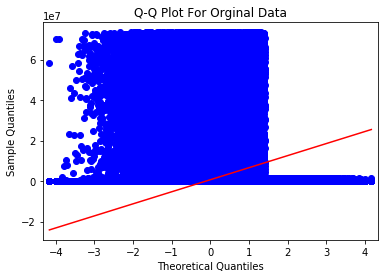

In [61]:
qqplot(dfn,line='s')
plt.title('Q-Q Plot For Orginal Data')
plt.show()

In [31]:
boxdfn=boxdf.drop(columns=['batch_enrolled','sub_grade','emp_title','Grade','home_ownership','verification_status','purpose','addr_state'])

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:273: RuntimeWarning: invalid value encountered in subtract
  scale = np.sqrt(((data - loc)**2).mean())
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


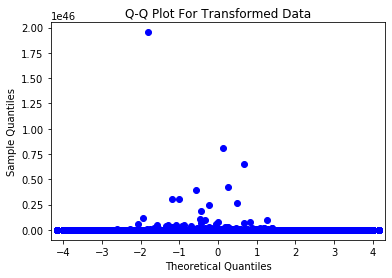

In [62]:
qqplot(boxdfn,line='s')
plt.title('Q-Q Plot For Transformed Data')
plt.show()

# Transformed data is alsmost normal for majority of features

# Shapiro - Wilk Test

In [36]:
from scipy.stats import shapiro
shapiro(dfn)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.09583067893981934, 0.0)

# So orginal data is not normal as p_value is <0.05

In [38]:

shapiro(boxdfn)

(nan, 1.0)

# Transformed Data is Normal as p_value is >0.05

In [39]:
# Levene Test

In [40]:
from scipy.stats import levene

In [41]:
s1=dfn.sample(10000,replace=True)

In [43]:
s2=dfn.sample(20000,replace=True)
s2

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT
49065,58539960,12000,12000.0,36,9.17,8.0,56000.00,33.40,0,0,30.0,13,0,17776,75.0,26,429.99,0.0,0.00,0.00,22.0,0,0.000000,51409.000000,23700.000000,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
10014,15639950,15000,15000.0,36,8.90,6.0,81000.00,16.50,0,0,30.0,15,0,11900,38.4,24,1151.82,0.0,0.00,0.00,52.0,0,0.000000,58449.000000,31000.000000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
18988,15520538,22000,22000.0,36,13.98,2.0,55000.00,24.00,1,0,20.0,7,0,19863,89.1,23,3206.81,0.0,0.00,0.00,65.0,0,0.000000,121670.000000,22300.000000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1432,3963520,10000,10000.0,36,10.16,6.0,107000.00,10.87,0,0,30.0,12,0,23457,59.8,14,1640.50,0.0,0.00,0.00,152.0,0,2585.000000,34024.000000,39200.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
59344,503690,14000,13900.0,36,9.63,1.0,78000.00,11.88,0,1,30.0,8,0,1236,3.9,29,2172.68,0.0,0.00,0.00,161.0,0,275.125327,84741.439343,316.923077,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
44755,13887100,12000,11975.0,36,12.99,6.0,50000.00,24.10,0,1,30.0,12,0,22453,60.2,27,1927.67,0.0,0.00,0.00,87.0,0,0.000000,30613.000000,37300.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
42787,14408480,24000,24000.0,36,8.90,3.0,87500.00,21.00,0,0,25.0,6,0,27482,81.3,17,2784.10,0.0,0.00,0.00,91.0,0,0.000000,42520.000000,33800.000000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0
13525,69403836,8425,8425.0,36,17.86,10.0,65000.00,13.74,0,2,39.0,8,1,1066,17.5,22,239.77,0.0,0.00,0.00,9.0,0,4664.000000,30119.000000,6100.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
63834,754369,5500,5475.0,60,13.23,3.0,27398.40,24.84,0,1,30.0,6,0,7553,40.4,9,1317.45,0.0,0.00,0.00,118.0,0,69.335750,0.000000,186.955446,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
36132,27179422,15000,15000.0,60,13.98,10.0,90000.00,6.21,0,1,38.0,8,1,17111,68.4,22,2253.02,0.0,0.00,0.00,61.0,0,0.000000,702988.000000,25000.000000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [44]:
s3=dfn.sample(30000,replace=True)
s4=dfn.sample(40000,replace=True)
s5=dfn.sample(50000,replace=True)

In [51]:
ledic={}
for i in dfn:
    
    res=levene(s1[i],s2[i],s3[i],s4[i],s5[i])
    ledic.update({i:res[1]})

In [ ]:
ledic




# revol_bal,collection_recovery_fee are having unequal variences for 5 sample data took from orginal data

In [53]:
sa=boxdfn.sample(30000,replace=True)
sb=boxdfn.sample(40000,replace=True)
sc=boxdfn.sample(50000,replace=True)
sd=boxdfn.sample(60000,replace=True)
se=boxdfn.sample(10000,replace=True)
sf=boxdfn.sample(10000,replace=True)

In [54]:
ledic1={}
for i in dfn:
    
    res=levene(sa[i],sb[i],sc[i],sd[i],se[i],sf[i])
    ledic1.update({i:res[1]})

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2343: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2348: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


In [55]:
ledic1
# inq_last_6mths 

{'member_id': 0.8858320774881896,
 'loan_amnt': 0.2362986789413665,
 'funded_amnt_inv': 0.2721010737495394,
 'term': 0.9684948364593065,
 'int_rate': 0.9142620366267606,
 'emp_length': 0.6759568231359694,
 'annual_inc': 0.4552621898170439,
 'dti': 0.998598086985161,
 'delinq_2yrs': 0.6675586721656971,
 'inq_last_6mths': 0.02595488225869578,
 'mths_since_last_delinq': 0.16768964188678967,
 'open_acc': 0.3788193782849851,
 'pub_rec': 0.26646320045982946,
 'revol_bal': 0.22001338621429778,
 'revol_util': 0.453529944077961,
 'total_acc': 0.08818639627115137,
 'total_rec_int': 0.4924639941978447,
 'total_rec_late_fee': 0.051594976558042197,
 'recoveries': 0.35489094443388297,
 'collection_recovery_fee': 0.7606529301210092,
 'last_week_pay': 0.08532999945445809,
 'acc_now_delinq': 0.6833625009727797,
 'tot_coll_amt': 0.7210359202401229,
 'tot_cur_bal': 0.6193397275315351,
 'total_rev_hi_lim': nan,
 'loan_status': 0.569192404467838,
 'grade_B': 0.4222265430231076,
 'grade_C': 0.42952418943816

# inq_last_6mths is having different varience values for 6 samples took from Transformed data

In [ ]:
# t-test, chi2, anova

# T- test

In [ ]:
# A One sample t-test tests the mean of a single group against a known mean

In [ ]:
# A Paired sample t-test compares means from the same group for two diff coloumns

In [ ]:
# An Independent Samples t-test compares the means for two groups.

In [11]:
63999* 0.3

19199.7

In [11]:
sam1 = df.sample(n=19000)

In [116]:
sam1

,member_id,loan_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,sub_grade,emp_title,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Grade,home_ownership,verification_status,purpose,addr_state
22944,33959602,7000,7000.0,36,OTHERS,11.67,B4,Not Available,6.0,46900.0,16.27,0,0,30.0,15,0,5074,18.7,22,798.20,0.00,0.00,0.0000,65.0,0,0.000000,2.783940e+05,27200.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,D,MORTGAGE,Not Verified,debt_consolidation,zone2
63779,776807,25000,24450.0,60,BAT5597801,17.43,E5,Not Available,6.0,120000.0,13.85,0,3,30.0,15,0,25470,73.4,34,1053.51,0.00,0.00,0.0000,17.0,0,163.390541,2.991029e+05,347.002725,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,B,MORTGAGE,Not Verified,debt_consolidation,zone3
9016,12033228,1500,1500.0,36,BAT1766061,13.98,C1,Manager,10.0,60000.0,26.02,0,2,27.0,20,0,11396,29.1,37,300.86,0.00,0.00,0.0000,104.0,0,0.000000,2.143520e+05,39100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,C,MORTGAGE,Source Verified,debt_consolidation,zone2
37002,58720587,21000,21000.0,36,BAT3873588,10.99,B4,Owner,2.0,100000.0,15.29,0,3,30.0,8,0,25574,87.0,27,1072.28,0.00,0.00,0.0000,26.0,0,673.000000,2.648870e+05,29400.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,A,MORTGAGE,Not Verified,debt_consolidation,zone2
3017,13857522,16750,16750.0,36,BAT5489674,14.64,C3,Public Coordinator,10.0,100000.0,6.54,0,1,42.0,12,1,9965,64.3,27,3154.81,0.00,0.00,0.0000,87.0,0,0.000000,3.054100e+05,15500.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,B,MORTGAGE,Verified,debt_consolidation,zone4
13814,54726350,1000,1000.0,36,OTHERS,13.99,C4,Manager,10.0,61000.0,32.44,0,1,36.0,17,1,31891,82.7,36,75.21,0.00,0.00,0.0000,31.0,0,0.000000,1.487210e+05,38543.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,B,MORTGAGE,Source Verified,debt_consolidation,zone3
23654,67762554,9000,9000.0,36,OTHERS,11.53,B5,Owner,10.0,24249.6,25.00,0,0,30.0,8,0,6836,38.2,13,159.40,0.00,0.00,0.0000,13.0,0,428.000000,3.938000e+04,17900.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,A,RENT,Source Verified,credit_card,zone5
21252,41422926,10000,10000.0,36,BAT4694572,11.44,B4,Others,10.0,50000.0,11.83,0,1,33.0,10,0,7409,35.6,15,875.46,0.00,0.00,0.0000,52.0,0,0.000000,7.756000e+03,20800.000000,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,D,MORTGAGE,Source Verified,credit_card,zone3
2653,23613162,17000,17000.0,60,BAT3193689,13.98,C3,Technician,4.0,45000.0,23.88,0,0,62.0,29,0,15298,50.5,40,3190.31,0.00,0.00,0.0000,78.0,0,0.000000,3.900220e+05,30300.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,D,MORTGAGE,Verified,debt_consolidation,zone3
51573,40374028,35000,35000.0,60,BAT4694572,15.99,D2,Accountant,9.0,519000.0,10.86,0,1,36.0,12,0,311984,72.7,38,5180.62,0.00,0.00,0.0000,52.0,0,0.000000,1.034998e+06,334100.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,A,MORTGAGE,Not Verified,debt_consolidation,zone3


In [117]:
pop_mean_fa = df['funded_amnt_inv'].mean()
sam1_mean_fa = sam1['funded_amnt_inv'].mean()

In [118]:
pop_mean_fa

14729.970742800566

In [119]:
sam1_mean_fa

14701.682532967523

In [115]:
import scipy.stats as st

# H0 - mean_sam = mean_pop
# H1 - mean_sam != mean_pop

# funded_amnt_inv

In [120]:
#t_stat
t_stat_fa = st.ttest_1samp(sam1['funded_amnt_inv'],pop_mean_fa)

In [121]:
t_stat_fa

Ttest_1sampResult(statistic=-0.46321490434915685, pvalue=0.6432156398965092)

In [49]:
#t_crit
t_crit_fa = st.t.isf(0.025,(len(sam1['funded_amnt_inv'])-1))

In [50]:
t_crit_fa

1.9600888553120819

In [123]:
#P_value
st.t.sf(0.463,df=(len(sam1['funded_amnt_inv'])-1)) * 2 

0.6433696701807035

In [ ]:
# we accept H0 

# int_rate

In [106]:
po_mean_ir = df['int_rate'].mean()
sam_mean_ir = sam1['int_rate'].mean()

In [111]:
t_stat_ir = st.ttest_1samp(sam1['int_rate'],po_mean_ir)
t_stat_ir

Ttest_1sampResult(statistic=-0.21346732861066472, pvalue=0.8309647603294441)

In [112]:
t_crit_ir = st.t.isf(0.025,(18999))
t_crit_ir

1.9600888553120819

In [ ]:
# We accept H0

# emp_length

In [109]:
po_mean_el = df['emp_length'].mean()
sa_mean_el = sam1['emp_length'].mean()

In [57]:
po_mean_el

6.0951733620837825

In [58]:
sa_mean_el

6.08

In [60]:
t_stat_el = st.ttest_1samp(sam1['emp_length'],po_mean_el)

In [61]:
t_stat_el

Ttest_1sampResult(statistic=-0.6071480935674012, pvalue=0.5437598914774278)

In [63]:
t_crit_ir = st.t.isf(0.05,(len(sam1['emp_length'])-1))

In [64]:
t_crit_ir

1.6449338334834882

In [ ]:
# We accept H0

# annual_inc

In [121]:
popmean_ai = df['annual_inc'].mean()
sammean_ai = sam1['annual_inc'].mean()

In [122]:
popmean_ai

74935.9046163222

In [125]:
sammean_ai

74894.12911473682

In [126]:
T_stat_ai = st.ttest_1samp(sam1['annual_inc'],popmean_ai)

In [134]:
T_stat_ai

Ttest_1sampResult(statistic=-0.1087813332558827, pvalue=0.9133770786378987)

In [128]:
# We accept H0

In [12]:
nu=sam1.describe()

In [13]:
tlist={}
plist={}
for i in nu:
    popmean = df[i].mean()
    sammean = sam1[i].mean()
    t_stat = st.ttest_1samp(sam1[i],popmean)
    print('T_stat value for '+i+'is :',t_stat[0])
    tlist.update({i:t_stat[0]})
    print('p_value for '+i+'is :',t_stat[1])
    plist.update({i:t_stat[1]})
    

T_stat value for member_idis : -0.10975675311870846
p_value for member_idis : 0.9126034489790096
T_stat value for loan_amntis : 0.877315963881623
p_value for loan_amntis : 0.38032613699306705
T_stat value for funded_amnt_invis : 0.9298913083018705
p_value for funded_amnt_invis : 0.3524391782342853
T_stat value for termis : 0.9728259292671051
p_value for termis : 0.33065220858480726
T_stat value for int_rateis : 0.5071360448409942
p_value for int_rateis : 0.6120652515819766
T_stat value for emp_lengthis : -0.05546853106206023
p_value for emp_lengthis : 0.9557657831687618
T_stat value for annual_incis : -0.5325756051899752
p_value for annual_incis : 0.5943336211102623
T_stat value for dtiis : 0.12534276891544455
p_value for dtiis : 0.9002535206344983
T_stat value for delinq_2yrsis : -0.23083369341358875
p_value for delinq_2yrsis : 0.8174464899913524
T_stat value for inq_last_6mthsis : -1.4676645501839858
p_value for inq_last_6mthsis : 0.14221191827038535
T_stat value for mths_since_last_

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4309: RuntimeWarning: invalid value encountered in double_scalars
  d = np.mean(a, axis) - popmean
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [35]:
# -1.96 to 1.9
pd.DataFrame(tlist.values())

,0
0,-0.109757
1,0.877316
2,0.929891
3,0.972826
4,0.507136
5,-0.055469
6,-0.532576
7,0.125343
8,-0.230834
9,-1.467665


In [41]:
# p _values
pd.DataFrame(plist.values(),index=plist.keys())

,0
member_id,0.912603
loan_amnt,0.380326
funded_amnt_inv,0.352439
term,0.330652
int_rate,0.612065
emp_length,0.955766
annual_inc,0.594334
dti,0.900254
delinq_2yrs,0.817446
inq_last_6mths,0.142212


# For all the columns except home_ownership_OTHER , we accept H0(mean_sam = mean_pop)

## Two sample independent t-test

In [63]:
df

,member_id,loan_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,sub_grade,emp_title,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Grade,home_ownership,verification_status,purpose,addr_state
0,58189336,14350,14350.000000,36,OTHERS,19.19,E3,Technician,9.0,28700.00,33.88,0,1,50.0,14,1,22515,73.1,28,1173.84,0.000000,0.00,0.0000,26.0,0,0.000000,28699.000000,30800.000000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,A,OWN,Not Verified,debt_consolidation,zone4
1,70011223,4800,4800.000000,36,BAT1586599,10.99,B4,Public Coordinator,1.0,65000.00,3.64,0,1,30.0,6,0,7624,23.2,13,83.95,0.000000,0.00,0.0000,9.0,0,0.000000,9974.000000,32900.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,B,RENT,Verified,debt_consolidation,zone4
2,70255675,10000,10000.000000,36,BAT1586599,7.26,A4,Driver,2.0,45000.00,18.42,0,0,30.0,5,0,10877,31.2,19,56.47,0.000000,0.00,0.0000,9.0,0,65.000000,38295.000000,34900.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,A,MORTGAGE,Verified,Business,zone2
3,1893936,15000,15000.000000,36,BAT4808022,19.72,D5,Engineer,10.0,105000.00,14.97,0,2,46.0,10,0,13712,55.5,21,4858.62,0.000000,0.00,0.0000,135.0,0,0.000000,55564.000000,24700.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,D,MORTGAGE,Verified,Business,zone4
4,7652106,16000,16000.000000,36,BAT2833642,10.64,B2,Others,10.0,52000.00,20.16,0,0,30.0,11,0,35835,76.2,27,2296.41,0.000000,0.00,0.0000,96.0,0,0.000000,47159.000000,47033.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,B,RENT,Verified,Personal,zone3
5,10247268,15000,14950.000000,36,BAT2575549,8.90,A5,Technician,2.0,120000.00,12.30,0,0,56.0,18,0,19040,64.5,30,1957.24,0.000000,0.00,0.0000,113.0,0,0.000000,350619.000000,29500.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,B,RENT,Verified,Personal,zone5
6,8089625,5000,4975.000000,36,OTHERS,7.90,A4,Others,5.0,75000.00,5.70,0,0,30.0,13,2,13272,23.9,23,578.36,0.000000,0.00,0.0000,117.0,0,1023.000000,13272.000000,55500.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,E,RENT,Verified,debt_consolidation,zone4
7,23043116,6000,6000.000000,36,OTHERS,9.17,B1,Public Coordinator,8.0,54000.00,11.63,0,1,46.0,13,0,3484,29.5,49,637.51,0.000000,0.00,0.0000,78.0,0,0.000000,272579.000000,11800.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,B,RENT,Source Verified,debt_consolidation,zone4
8,45900933,6000,6000.000000,36,BAT4136152,13.99,C4,Others,7.0,92000.00,30.85,0,0,77.0,16,0,47567,76.6,27,621.72,0.000000,0.00,0.0000,44.0,0,0.000000,281521.000000,62100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,F,RENT,Not Verified,Personal,zone4
9,41272507,34550,34550.000000,60,BAT4694572,17.14,D4,Nurse,2.0,72000.00,33.92,0,0,30.0,12,0,30040,90.5,30,5535.46,0.000000,0.00,0.0000,52.0,0,0.000000,76034.000000,33200.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,C,RENT,Verified,debt_consolidation,zone1


In [64]:
s1fa = df['funded_amnt_inv'].sample(n=5000,replace=True)
s2fa = df['funded_amnt_inv'].sample(n=35000,replace=True)

In [65]:
st.ttest_ind(s1fa,s2fa)

Ttest_indResult(statistic=1.2334740174662375, pvalue=0.2174062130854155)

# Mean of sample 1 data(size=5000) = mean of sample 2 data(size=35000) for funded_amnt_inv

In [66]:
s1la = df['loan_amnt'].sample(n=40000,replace=True)
s2fa = df['funded_amnt_inv'].sample(n=15000,replace=True)

In [67]:
st.ttest_ind(s1la,s2fa)

Ttest_indResult(statistic=-0.6328819575245577, pvalue=0.5268133621828477)

# Mean of Loan amount and funded amount of diff sample sizes are equal

In [68]:
st.ttest_ind(df['int_rate'],df['annual_inc'])

Ttest_indResult(statistic=-348.25042809100273, pvalue=0.0)

# Means of int rate and annual inc are not eqaul . 

In [70]:
s1ai = df['annual_inc'].sample(n=1000,replace=True)
s2ai = df['annual_inc'].sample(n=60000,replace=True)

In [71]:
st.ttest_ind(s1ai,s2ai)

Ttest_indResult(statistic=-0.13805989550093797, pvalue=0.8901935366552616)

# Mean of annual inc(sample size=1000) and Mean of annual inc(sample size=60000) are equal 

In [72]:
s1ir = df['int_rate'].sample(n=25000,replace=True)
s2dti =df['dti'].sample(n=3000,replace=True)

In [73]:
st.ttest_ind(s1ir,s2dti)

Ttest_indResult(statistic=-52.751642905390526, pvalue=0.0)

# Means of int rate , dti are diff

In [75]:
st.ttest_ind(df['funded_amnt_inv'],df['annual_inc'])

Ttest_indResult(statistic=-276.56039317232757, pvalue=0.0)

# Means of funded amount and annual inc are diff

In [76]:
st.ttest_ind(df['dti'],df['revol_util'])

Ttest_indResult(statistic=-369.3060537929524, pvalue=0.0)

# Means of dti and revol_util are diff

In [77]:
s1el = df['emp_length'].sample(n=35000,replace=True)
s2el = df['emp_length'].sample(n=15000,replace=True) 

In [79]:
st.ttest_ind(s1el,s2el)

Ttest_indResult(statistic=0.011029390407406513, pvalue=0.9912000421007554)

# Mean of employee lenghts of two diff samples are equal

In [80]:
s1rb = df['revol_bal'].sample(n=25000,replace=True)
s2rb = df['revol_bal'].sample(n=55000,replace=True)

In [81]:
st.ttest_ind(s1rb,s2rb)

Ttest_indResult(statistic=-0.2706795050871921, pvalue=0.7866382394440629)

# Mean of revol balance for two diff samples are equal

In [82]:
s1ta = df['total_acc'].sample(n=5000,replace=True)
s2ta = df['total_acc'].sample(n=50000,replace=True)

In [83]:
st.ttest_ind(s1ta,s2ta)

Ttest_indResult(statistic=-1.6068633351259922, pvalue=0.10809009161924334)

# Mean of total acc for two diff samples are equal

In [84]:
s1ti = df['total_rec_int'].sample(n=500,replace=True)
s2ti = df['total_rec_int'].sample(n=60000,replace=True)

In [85]:
st.ttest_ind(s1ti,s2ti)

Ttest_indResult(statistic=0.793340251132706, pvalue=0.4275827229390874)

# Mean of total_rec_int for two diff samples are equal

In [86]:
s1lp = df['last_week_pay'].sample(n=2500,replace=True)
s12p = df['last_week_pay'].sample(n=20000,replace=True)

In [87]:
st.ttest_ind(s1lp,s12p)

Ttest_indResult(statistic=-1.0146446999348326, pvalue=0.31028613491782836)

# Mean of last week pay for two diff samples are equal

In [88]:
s1tc = df['tot_cur_bal'].sample(n=25000,replace=True)
s2tc = df['tot_cur_bal'].sample(n=55000,replace=True)

In [89]:
st.ttest_ind(s1tc,s2tc)

Ttest_indResult(statistic=2.4335074298425248, pvalue=0.014955502920135802)

#  Mean of total curr balence pay for two diff samples are not equal

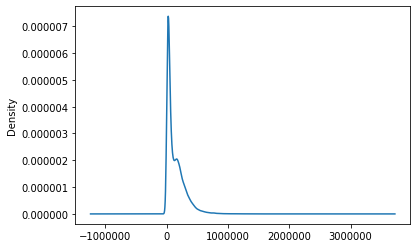

In [90]:
df['tot_cur_bal'].plot(kind='kde')

In [91]:
s1tr = df['total_rev_hi_lim'].sample(n=53000,replace=True)
s2tr = df['total_rev_hi_lim'].sample(n=20000,replace=True)

In [92]:
st.ttest_ind(s1tr,s2tr)

Ttest_indResult(statistic=-0.05698751822431816, pvalue=0.9545552939707)

# Mean of total_rev_hi_lim for two diff samples are equal

# Chi-square Test of Independence

In [ ]:
# H0- The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent

In [ ]:
# Ha - The null hypothesis of the Chi-Square test is that relationship exists on the categorical variables in the population; they are dependent

# Grade Vs Home Ownership

In [151]:
ct1 = pd.crosstab(df['Grade'],df['home_ownership'])
ct1

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
Grade,,,,,,
A,0,6124,0,0,1038,3510
B,0,9330,0,5,1775,7270
C,0,8594,2,5,1737,7525
D,1,4643,0,3,997,4379
E,0,2354,0,0,526,2136
F,0,751,0,0,170,756
G,0,182,0,0,36,150


In [155]:
chi2stat_ct1 = st.chi2_contingency(ct1)

In [156]:
chi2stat_ct1

(403.67321713574097,
 5.059583985218057e-67,
 30,
 array([[1.66752606e-01, 5.33241482e+03, 3.33505211e-01, 2.16778387e+00,
         1.04703961e+03, 4.28987753e+03],
        [2.87191987e-01, 9.18382537e+03, 5.74383975e-01, 3.73349584e+00,
         1.80327849e+03, 7.38830107e+03],
        [2.79113736e-01, 8.92549905e+03, 5.58227472e-01, 3.62847857e+00,
         1.75255515e+03, 7.18047998e+03],
        [1.56611822e-01, 5.00813285e+03, 3.13223644e-01, 2.03595369e+00,
         9.83365631e+02, 4.02899573e+03],
        [7.83762246e-02, 2.50631491e+03, 1.56752449e-01, 1.01889092e+00,
         4.92124314e+02, 2.01630675e+03],
        [2.62035344e-02, 8.37936624e+02, 5.24070689e-02, 3.40645948e-01,
         1.64531993e+02, 6.74112127e+02],
        [5.75008985e-03, 1.83876373e+02, 1.15001797e-02, 7.47511680e-02,
         3.61048141e+01, 1.47926811e+02]]))

In [157]:
chi2cri_ct1 = st.chi2.isf(0.05,30)

In [158]:
chi2cri_ct1

43.77297182574217

In [166]:
st.chi2.sf(chi2stat_ct1[0],30)

5.059583985218057e-67

 # Grade and Home Ownership are dependent on each other.

# Grade Vs Verification status

In [167]:
ct2 = pd.crosstab(df['Grade'],df['verification_status'])
chi2stat_ct2 = st.chi2_contingency(ct2)
chi2stat_ct2

(3475.1151146629195,
 0.0,
 12,
 array([[3200.31600494, 3954.87154487, 3516.81245019],
        [5511.7886217 , 6811.33236457, 6056.87901373],
        [5356.75082423, 6619.74048032, 5886.50869545],
        [3005.69408897, 3714.36258379, 3302.94332724],
        [1504.19650307, 1858.84891951, 1652.95457742],
        [ 502.89823278,  621.46922608,  552.63254113],
        [ 110.35572431,  136.37488086,  121.26939483]]))

In [168]:
st.chi2.sf(chi2stat_ct2[0],12)

0.0

# Grade and Verification status are dependent on each other

In [42]:
cat =['Grade','home_ownership','verification_status','purpose','addr_state','emp_title','sub_grade','batch_enrolled']

In [43]:
dic1={}
for i in cat:
    ct = pd.crosstab(df[cat[0]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic1.update({i:chi2stat[1]})
    
    
    

In [46]:
pd.DataFrame(dic1.values())

,0
0,0.000000e+00
1,5.059584e-67
2,0.000000e+00
3,0.000000e+00
4,2.102574e-03
5,8.841906e-02
6,3.369004e-01
7,1.548895e-01


# Grade is dependent on home_ownership,verification_status,purpose,addr_state,

In [188]:
dic2={}
for i in cat:
    ct = pd.crosstab(df[cat[1]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic2.update({i:chi2stat[1]})

In [189]:
dic2

{'Grade': 5.059583985218057e-67,
 'home_ownership': 0.0,
 'verification_status': 5.1840551806845024e-33,
 'purpose': 0.0,
 'addr_state': 0.0,
 'emp_title': 0.8477334827832012,
 'sub_grade': 0.9918863690603542,
 'batch_enrolled': 0.9999999999999012}

# Home_onweship is dependent on Grade,verification_status,purpose,addr_state,

In [192]:
dic3={}
for i in cat:
    ct = pd.crosstab(df[cat[2]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic3.update({i:chi2stat[1]})

In [193]:
dic3

{'Grade': 0.0,
 'home_ownership': 5.1840551806845024e-33,
 'verification_status': 0.0,
 'purpose': 3.7675251761064185e-48,
 'addr_state': 0.06191262447155239,
 'emp_title': 0.37285241799657415,
 'sub_grade': 0.10928557296583849,
 'batch_enrolled': 0.8002488905989764}

# verification_status is dependent on Grade,home_ownership,purpose,

In [194]:
dic4={}
for i in cat:
    ct = pd.crosstab(df[cat[3]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic4.update({i:chi2stat[1]})

In [195]:
dic4

{'Grade': 0.0,
 'home_ownership': 0.0,
 'verification_status': 3.7675251761063656e-48,
 'purpose': 0.0,
 'addr_state': 2.4176314967698156e-09,
 'emp_title': 0.9647948612754745,
 'sub_grade': 0.36131949338661684,
 'batch_enrolled': 0.9936856084318555}

# Purpose is dependent on Grade,home_ownership,verification_status,addr_state

In [196]:
dic5={}
for i in cat:
    ct = pd.crosstab(df[cat[4]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic5.update({i:chi2stat[1]})

In [197]:
dic5

{'Grade': 0.002102574146456701,
 'home_ownership': 0.0,
 'verification_status': 0.06191262447155239,
 'purpose': 2.417631496769833e-09,
 'addr_state': 0.0,
 'emp_title': 0.7018158874761842,
 'sub_grade': 0.13679752360588637,
 'batch_enrolled': 0.10266217691261983}

# Addr-state is dependent on Grade,home_ownership,purpose,

In [198]:
dic6={}
for i in cat:
    ct = pd.crosstab(df[cat[5]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic6.update({i:chi2stat[1]})

In [199]:
dic6

{'Grade': 0.08841905661859378,
 'home_ownership': 0.8477334827832009,
 'verification_status': 0.37285241799657415,
 'purpose': 0.9647948612754745,
 'addr_state': 0.701815887476184,
 'emp_title': 0.0,
 'sub_grade': 5.484991079216188e-08,
 'batch_enrolled': 0.0}

# emp_title is dependent on sub_grade,batch_enrolled

In [200]:
dic7={}
for i in cat:
    ct = pd.crosstab(df[cat[6]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic7.update({i:chi2stat[1]})

In [201]:
dic7

{'Grade': 0.3369004416507952,
 'home_ownership': 0.9918863690603542,
 'verification_status': 0.10928557296583817,
 'purpose': 0.36131949338661684,
 'addr_state': 0.13679752360588593,
 'emp_title': 5.484991079216188e-08,
 'sub_grade': 0.0,
 'batch_enrolled': 1.4187569996820562e-138}

# sub_grade is dependent on emp_title,batch_enrolled

In [202]:
dic8={}
for i in cat:
    ct = pd.crosstab(df[cat[7]],df[i])
    chi2stat = st.chi2_contingency(ct)
    dic8.update({i:chi2stat[1]})

In [203]:
dic8

{'Grade': 0.15488946361088415,
 'home_ownership': 0.9999999999999012,
 'verification_status': 0.8002488905989769,
 'purpose': 0.9936856084318555,
 'addr_state': 0.10266217691261983,
 'emp_title': 0.0,
 'sub_grade': 1.4187569996820562e-138,
 'batch_enrolled': 0.0}

# batch_enrolled is dependent on emp_title,sub_grade

# Anova Test

In [9]:
df

,member_id,loan_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,sub_grade,emp_title,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Grade,home_ownership,verification_status,purpose,addr_state
0,58189336,14350,14350.000000,36,OTHERS,19.19,E3,Technician,9.0,28700.00,33.88,0,1,50.0,14,1,22515,73.1,28,1173.84,0.000000,0.00,0.0000,26.0,0,0.000000,28699.000000,30800.000000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,A,OWN,Not Verified,debt_consolidation,zone4
1,70011223,4800,4800.000000,36,BAT1586599,10.99,B4,Public Coordinator,1.0,65000.00,3.64,0,1,30.0,6,0,7624,23.2,13,83.95,0.000000,0.00,0.0000,9.0,0,0.000000,9974.000000,32900.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,B,RENT,Verified,debt_consolidation,zone4
2,70255675,10000,10000.000000,36,BAT1586599,7.26,A4,Driver,2.0,45000.00,18.42,0,0,30.0,5,0,10877,31.2,19,56.47,0.000000,0.00,0.0000,9.0,0,65.000000,38295.000000,34900.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,A,MORTGAGE,Verified,Business,zone2
3,1893936,15000,15000.000000,36,BAT4808022,19.72,D5,Engineer,10.0,105000.00,14.97,0,2,46.0,10,0,13712,55.5,21,4858.62,0.000000,0.00,0.0000,135.0,0,0.000000,55564.000000,24700.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,D,MORTGAGE,Verified,Business,zone4
4,7652106,16000,16000.000000,36,BAT2833642,10.64,B2,Others,10.0,52000.00,20.16,0,0,30.0,11,0,35835,76.2,27,2296.41,0.000000,0.00,0.0000,96.0,0,0.000000,47159.000000,47033.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,B,RENT,Verified,Personal,zone3
5,10247268,15000,14950.000000,36,BAT2575549,8.90,A5,Technician,2.0,120000.00,12.30,0,0,56.0,18,0,19040,64.5,30,1957.24,0.000000,0.00,0.0000,113.0,0,0.000000,350619.000000,29500.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,B,RENT,Verified,Personal,zone5
6,8089625,5000,4975.000000,36,OTHERS,7.90,A4,Others,5.0,75000.00,5.70,0,0,30.0,13,2,13272,23.9,23,578.36,0.000000,0.00,0.0000,117.0,0,1023.000000,13272.000000,55500.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,E,RENT,Verified,debt_consolidation,zone4
7,23043116,6000,6000.000000,36,OTHERS,9.17,B1,Public Coordinator,8.0,54000.00,11.63,0,1,46.0,13,0,3484,29.5,49,637.51,0.000000,0.00,0.0000,78.0,0,0.000000,272579.000000,11800.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,B,RENT,Source Verified,debt_consolidation,zone4
8,45900933,6000,6000.000000,36,BAT4136152,13.99,C4,Others,7.0,92000.00,30.85,0,0,77.0,16,0,47567,76.6,27,621.72,0.000000,0.00,0.0000,44.0,0,0.000000,281521.000000,62100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,F,RENT,Not Verified,Personal,zone4
9,41272507,34550,34550.000000,60,BAT4694572,17.14,D4,Nurse,2.0,72000.00,33.92,0,0,30.0,12,0,30040,90.5,30,5535.46,0.000000,0.00,0.0000,52.0,0,0.000000,76034.000000,33200.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,C,RENT,Verified,debt_consolidation,zone1


In [9]:
import scipy.stats as st

In [73]:
from statsmodels.formula.api import ols 

In [74]:
from statsmodels.stats.anova import anova_lm

In [18]:
df['total_rev_hi_lim'][df['total_rev_hi_lim']!=np.inf].mean()

29679.267428829568

In [22]:
df['total_rev_hi_lim'].replace(np.inf,df['total_rev_hi_lim'][df['total_rev_hi_lim']!=np.inf].mean(),inplace=True)

In [23]:
ass='loan_status~member_id+loan_amnt+funded_amnt_inv+term+batch_enrolled+int_rate+sub_grade+emp_title+emp_length+annual_inc+dti+delinq_2yrs+inq_last_6mths+mths_since_last_delinq+open_acc+pub_rec+revol_bal+revol_util+total_acc+total_rec_int+total_rec_late_fee+recoveries+collection_recovery_fee+last_week_pay+acc_now_delinq+tot_coll_amt+tot_cur_bal+total_rev_hi_lim+Grade+home_ownership+verification_status+purpose+addr_state+initial_list_status_w+application_type_JOINT'
model = ols(ass,data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
batch_enrolled,101.0,1968.916684,19.494225,178.155294,0.000000e+00
sub_grade,34.0,44.032126,1.295063,11.835415,2.660100e-64
emp_title,9.0,81.519663,9.057740,82.777562,1.209861e-153
Grade,6.0,0.699730,0.116622,1.065791,3.804646e-01
home_ownership,5.0,1.202326,0.240465,2.197582,5.163394e-02
verification_status,2.0,0.271914,0.135957,1.242493,2.886705e-01
purpose,5.0,1.060440,0.212088,1.938246,8.448806e-02
addr_state,4.0,0.197344,0.049336,0.450875,7.718415e-01
member_id,1.0,1169.509747,1169.509747,10688.004129,0.000000e+00
loan_amnt,1.0,28.019793,28.019793,256.069408,1.597593e-57


# batch_enrolled,sub_grade,emp_title,member_id,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,tot_cur_bal,total_rev_hi_lim,initial_list_status_w are having p_values < 0.05 . So we Reject H0 . Thus loan_stauts has interaction(dependent) on these columns .

# Grade,home_ownership,verification_status,purpose,addr_state,funded_amnt_inv,open_acc,acc_now_delinq,tot_coll_amt are having P_values > 0.05 .So we fail to reject H0 , So loan_stauts is having no interacation with these columns

In [98]:
model.resid.min()

-1.402323189192625

In [97]:
model.resid.max()

2.831129090887344

# Range of residuals are from -1.4 t0 2.83

In [ ]:
# 